## MDS Thesis
#### 03. Visualize results

<br>
<hr style="opacity: 0.5">

### Setup

In [70]:
# had to install statsmodels this way
#!/Users/varvarailyina/hertie/mds_thesis/env/bin/python -m pip install statsmodels

In [1]:
# load libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
# set wd
ROOT_DIR = "/Users/varvarailyina/hertie/mds_thesis"

-- *Load data*

In [3]:
# load clean data
df_clean = pd.read_pickle(os.path.join(ROOT_DIR, "data", "out", "df_clean.pkl"))

In [4]:
df_clean.columns

Index(['party', 'date', 'month', 'issue_mono', 'issue_label', 'text', 'anger',
       'fear', 'disgust', 'sadness', 'joy', 'enthusiasm', 'pride', 'hope',
       'n_sentences', 'anger_norm', 'fear_norm', 'disgust_norm',
       'sadness_norm', 'joy_norm', 'enthusiasm_norm', 'pride_norm',
       'hope_norm', 'total_emotion_mentions', 'emotion_intensity',
       'anger_share', 'fear_share', 'disgust_share', 'sadness_share',
       'joy_share', 'enthusiasm_share', 'pride_share', 'hope_share'],
      dtype='object')

-- *Clean `month` column*

In [18]:
# convert to string
df_clean['month'] = df_clean['month'].astype(str)

# convert to datetime (adds '20' prefix to turn '1307' → '2013-07-01')
df_clean['month_dt'] = pd.to_datetime('20' + df_clean['month'], format='%Y%m')

# remove time and replace `month` variable
df_clean['month'] = df_clean['month_dt'].dt.strftime('%Y-%m')

-- *Clean `date` column*

In [19]:
# convert `date` to a string
df_clean['date'] = pd.to_datetime(df_clean['date']).dt.date
df_clean['date'] = df_clean['date'].astype(str)

-- *Clean df for plotting emotion shares*

In [20]:
# define columns with emotion shares
emotion_share_cols = [col for col in df_clean.columns if col.endswith('_share')]

# melt df for plotting
df_shares = df_clean.melt(
    id_vars=['party'],
    value_vars=emotion_share_cols,
    var_name='emotion',
    value_name='value'
)

# clean emotion labels
df_shares['emotion'] = df_shares['emotion'].str.replace('_share', '').str.title()

-- *Specify things*

In [11]:
# specify emotion columns
emotion_cols = ['anger', 'fear', 'disgust', 'sadness', 'joy', 'enthusiasm', 'pride', 'hope']

In [6]:
# define party colors
party_colors = {
    'CDU/CSU': '#000000',
    'SPD': '#E3000F',
    'Greens': '#46962B',
    'FDP': '#FFED00',
    'Left': '#8C3473',
    'AfD': '#009EE0'
}

# define emotion colors
emotion_colors = {
    #'anger': '#b2182b',
    'anger': '#e66101',
    'fear': '#5e3c99',
    'disgust': '#1b7837',
    'sadness': '#2166ac',
    'joy': '#fdb863',
    'enthusiasm': '#b2abd2',
    'pride': '#d01c8b',
    'hope': '#80cdc1'
}

In [142]:
# alternative emotion colors
emotion_colors = {
    'anger': '#b2182b',
    'fear': '#2166ac',
    'disgust': '#1a9850',
    'sadness': '#762a83',
    'joy': '#fdb863',
    'enthusiasm': '#80cdc1',
    'pride': '#e66101',
    'hope': '#c7e9b4'
}

<hr style="opacity: 0.25">

### Visualize results (emotional intensity)

-- *Emotional intensity by party*

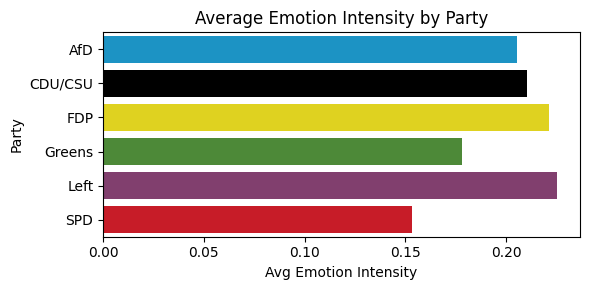

In [7]:
# average emotion intensity by party
plt.figure(figsize=(6, 3))
sns.barplot(
    data=df_clean,
    x='emotion_intensity',
    y='party',
    hue='party',
    dodge=False,
    estimator=np.mean,
    errorbar=None,
    palette=party_colors,
    legend=False
)
plt.title('Average Emotion Intensity by Party')
plt.xlabel('Avg Emotion Intensity')
plt.ylabel('Party')
plt.tight_layout()
plt.show()

-- *Most emotional press releases*

In [8]:
# top 10 most emotional press releases
top_emotional = df_clean.sort_values(by='emotion_intensity', ascending=False).head(10)

# truncate text for display
top_emotional['text'] = top_emotional['text'].str[:100] + '...'

# print preview
print(top_emotional[['party', 'date', 'emotion_intensity', 'text']])

         party        date  emotion_intensity  \
26881     Left  2012-12-04           2.942307   
5374   CDU/CSU  2012-05-24           2.758669   
6623   CDU/CSU  2014-01-10           2.422532   
24762     Left  2011-03-01           2.195207   
12783      FDP  2013-06-11           1.867665   
12825      FDP  2013-06-26           1.830855   
1551       AfD  2018-04-04           1.809925   
18796   Greens  2013-01-24           1.691863   
9198   CDU/CSU  2018-06-27           1.683860   
1544       AfD  2018-04-04           1.487173   

                                                    text  
26881  Zum erfolgreichen Volksbegehren in Brandenburg...  
5374   Der Rechtsschutz bei Bundestagswahlen wird ver...  
6623   „Die CDU/CSU-Bundestagsfraktion begrüßt außero...  
24762  Zum Rücktritt von Verteidigungsminister zu Gut...  
12783  . Zu den anhaltenden Protesten in der Türkei u...  
12825  . Zu den Ankündigungen von US-Präsident Barack...  
1551   Zum Bericht eines britischen Militärlabo

In [9]:
top_emotional

party        date  month  issue_mono            issue_label  \
26881     Left  2012-12-04   1212          10         Transportation   
5374   CDU/CSU  2012-05-24   1205          20  Government Operations   
6623   CDU/CSU  2014-01-10   1401           2           Civil Rights   
24762     Left  2011-03-01   1103          20  Government Operations   
12783      FDP  2013-06-11   1306         191  International Affairs   
12825      FDP  2013-06-26   1306           7            Environment   
1551       AfD  2018-04-04   1804         191  International Affairs   
18796   Greens  2013-01-24   1301         191  International Affairs   
9198   CDU/CSU  2018-06-27   1806         191  International Affairs   
1544       AfD  2018-04-04   1804           9            Immigration   

                                                    text     anger      fear  \
26881  Zum erfolgreichen Volksbegehren in Brandenburg...  0.042964  0.017358   
5374   Der Rechtsschutz bei Bundestagswahlen wird ver...  0.009559  0.005474   
6623   „Die CDU/CSU-Bundestagsfraktion begrüßt außero...  0.013790  0.005845   
24762  Zum Rücktritt von Verteidigungsminister zu Gut...  0.970606  0.201984   
12783  . Zu den anhaltenden Protesten in der Türkei u...  0.199973  0.645891   
12825  . Zu den Ankündigungen von US-Präsident Barack...  0.073950  0.025484   
1551   Zum Bericht eines britischen Militärlabors, es...  0.392165  0.289044   
18796  Menschenrechtsverletzungen in Mali entgegen zu...  0.138077  0.217741   
9198   „Der ISt GH leistet im Kampf gegen die Straflo...  0.133833  0.039025   
1544   ündigung von Bundesinnenminister Horst Seehofe...  0.991688  0.221129   

        disgust   sadness  ...  total_emotion_mentions  emotion_intensity  \
26881  0.006249  0.018308  ...                2.942307           2.942307   
5374   0.002273  0.004464  ...                2.758669           2.758669   
6623   0.003457  0.014521  ...                2.422532           2.422532   
24762  0.259591  0.689177  ...                2.195207           2.195207   
12783  0.036430  0.829280  ...                1.867665           1.867665   
12825  0.010254  0.014416  ...                1.830855           1.830855   
1551   0.075015  0.786536  ...                1.809925           1.809925   
18796  0.004556  0.113570  ...                1.691863           1.691863   
9198   0.002524  0.009491  ...                1.683860           1.683860   
1544   0.087454  0.117290  ...                1.487173           1.487173   

       anger_share  fear_share  disgust_share  sadness_share  joy_share  \
26881         1.46        0.59           0.21           0.62      29.65   
5374          0.35        0.20           0.08           0.16      31.87   
6623          0.57        0.24           0.14           0.60      29.23   
24762        44.21        9.20          11.83          31.39       0.46   
12783        10.71       34.58           1.95          44.40       0.79   
12825         4.04        1.39           0.56           0.79      52.16   
1551         21.67       15.97           4.14          43.46       1.82   
18796         8.16       12.87           0.27           6.71       0.76   
9198          7.95        2.32           0.15           0.56       1.26   
1544         66.68       14.87           5.88           7.89       0.55   

       enthusiasm_share  pride_share  hope_share  
26881             13.70        27.06       26.69  
5374              13.26        25.86       28.23  
6623              16.31        37.35       15.55  
24762              0.79         1.16        0.96  
12783              1.91         0.87        4.79  
12825              4.77        12.08       24.21  
1551               2.90         4.00        6.03  
18796             23.43         3.23       44.56  
9198              31.98         2.22       53.57  
1544               1.13         0.66        2.35  

[10 rows x 33 columns]

<hr style="opacity: 0.25">

### Visualize results (total emotions)

-- *Total mentions of each emotion across all press releases*

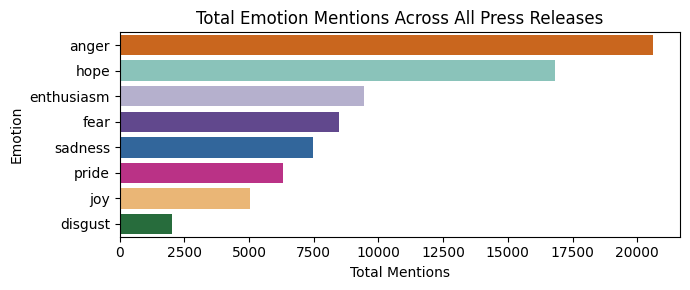

In [12]:
# convert emotion totals to df
emotion_totals = df_clean[emotion_cols].sum().sort_values(ascending=False)
emotion_df = emotion_totals.reset_index()
emotion_df.columns = ['emotion', 'total_mentions']

# plot
plt.figure(figsize=(7, 3))
sns.barplot(
    data=emotion_df,
    x='total_mentions',
    y='emotion',
    hue='emotion',
    dodge=False,
    palette=emotion_colors,
    legend=False
)
plt.title('Total Emotion Mentions Across All Press Releases')
plt.xlabel('Total Mentions')
plt.ylabel('Emotion')
plt.tight_layout()
plt.show()

-- *Distribution of total emotions across parties*

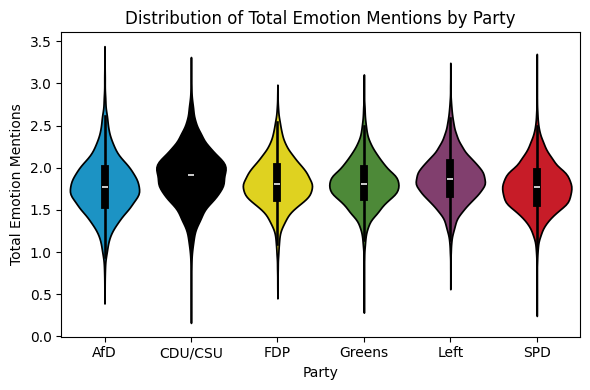

In [13]:
# violin plot
plt.figure(figsize=(6, 4))
sns.violinplot(
    data=df_clean,
    x='party',
    y='total_emotion_mentions',
    hue='party',
    palette=party_colors,
    inner='box',
    dodge=False,
    legend=False
)
plt.title('Distribution of Total Emotion Mentions by Party')
plt.xlabel('Party')
plt.ylabel('Total Emotion Mentions')
plt.tight_layout()
plt.show()

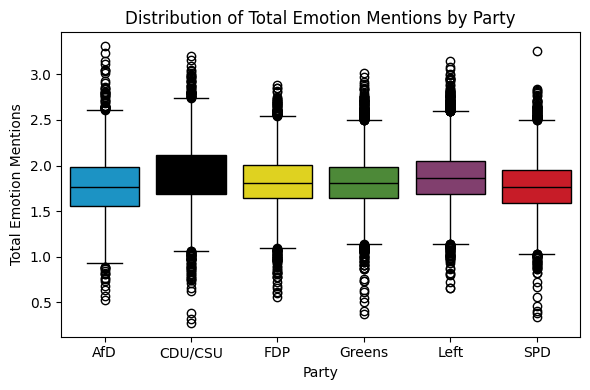

In [14]:
# box plot
plt.figure(figsize=(6, 4))
sns.boxplot(
    data=df_clean,
    x='party',
    y='total_emotion_mentions',
    hue='party',
    palette=party_colors,
    dodge=False,
    legend=False
)
plt.title('Distribution of Total Emotion Mentions by Party')
plt.xlabel('Party')
plt.ylabel('Total Emotion Mentions')
plt.tight_layout()
plt.show()

<hr style="opacity: 0.25">

### Visualize results (emotion shares)

-- *Barplot of average emotion shares by party*

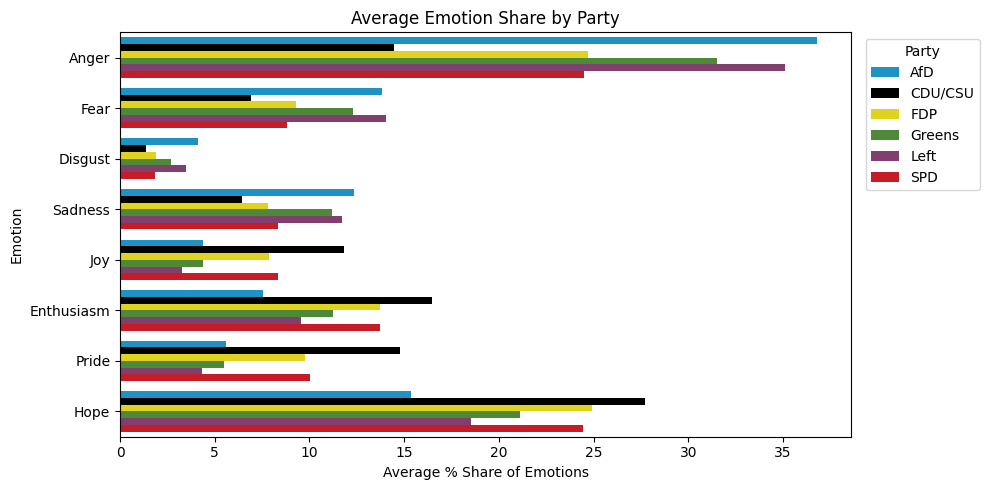

In [21]:
# share of each emotion by party
plt.figure(figsize=(10, 5))
sns.barplot(data=df_shares, x='value', y='emotion', hue='party', palette=party_colors, errorbar=None)
plt.title('Average Emotion Share by Party')
plt.xlabel('Average % Share of Emotions')
plt.ylabel('Emotion')
plt.legend(title='Party', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

-- *Distribution of each emotion across parties*

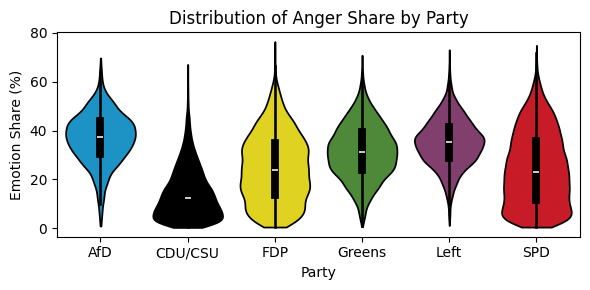

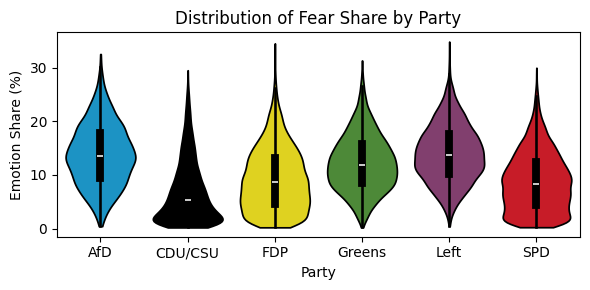

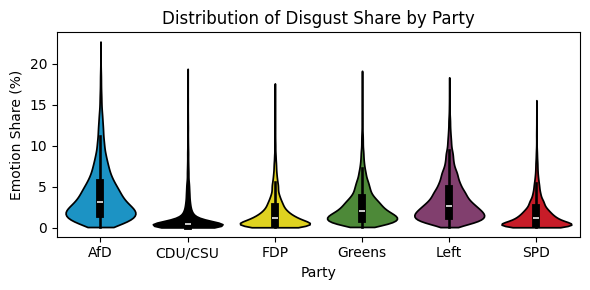

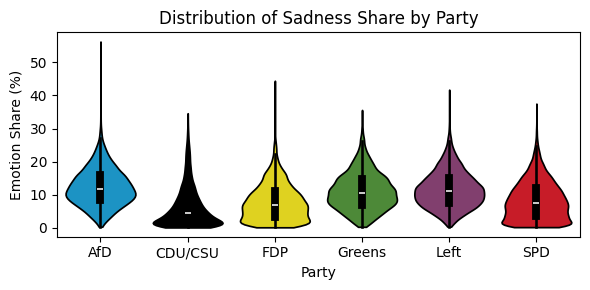

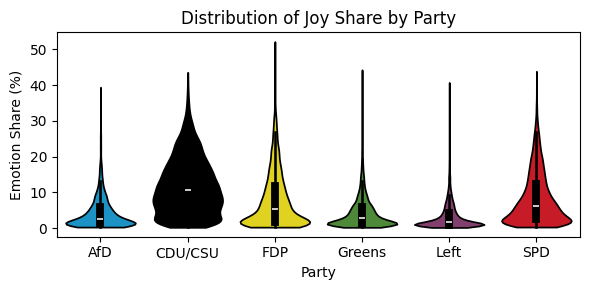

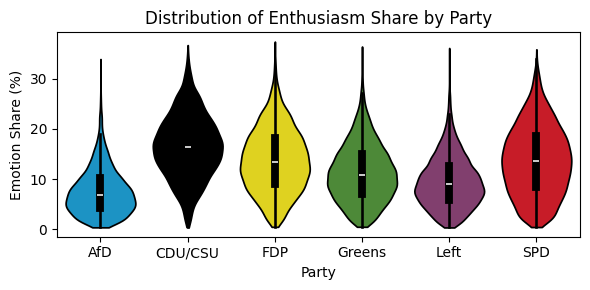

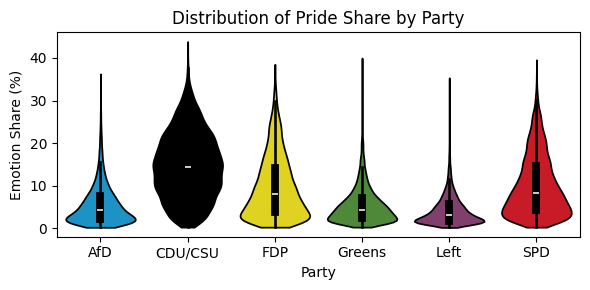

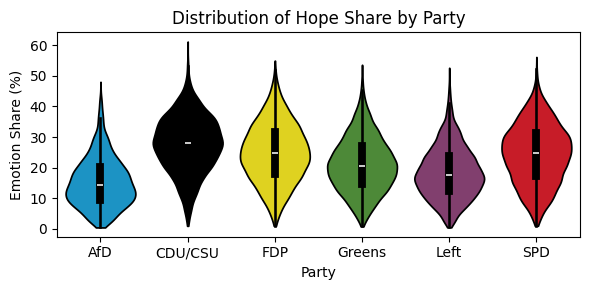

In [22]:
# loop over each emotion for violin plots by party
for emotion in df_shares['emotion'].unique():
    plt.figure(figsize=(6, 3))
    sns.violinplot(
    data=df_shares[df_shares['emotion'] == emotion],
    x='party',
    y='value',
    hue='party',
    palette=party_colors,
    inner='box',
    cut=0,
    dodge=False,
    legend=False
)
    plt.title(f'Distribution of {emotion} Share by Party')
    plt.xlabel('Party')
    plt.ylabel('Emotion Share (%)')
    #plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

-- *Stacked area plot of emotion share by party over time*

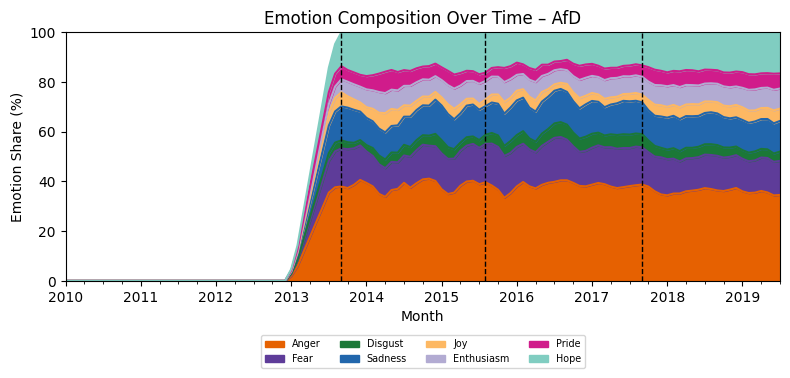

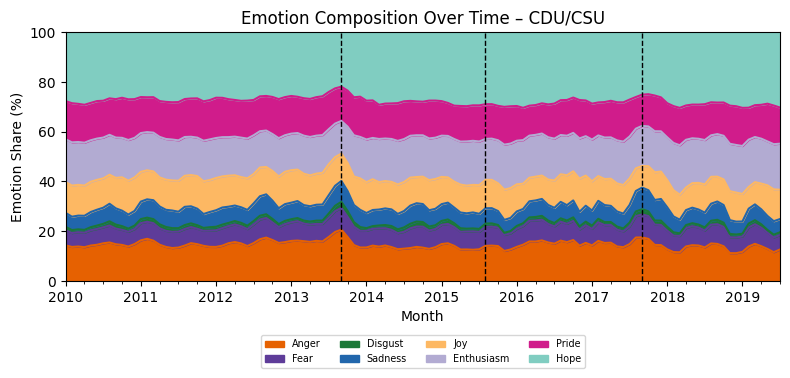

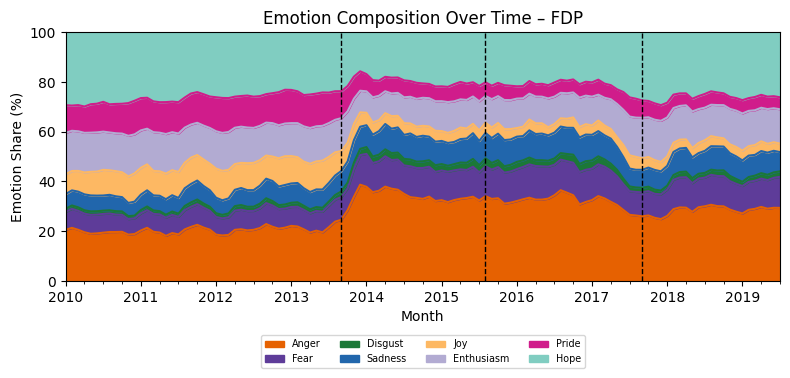

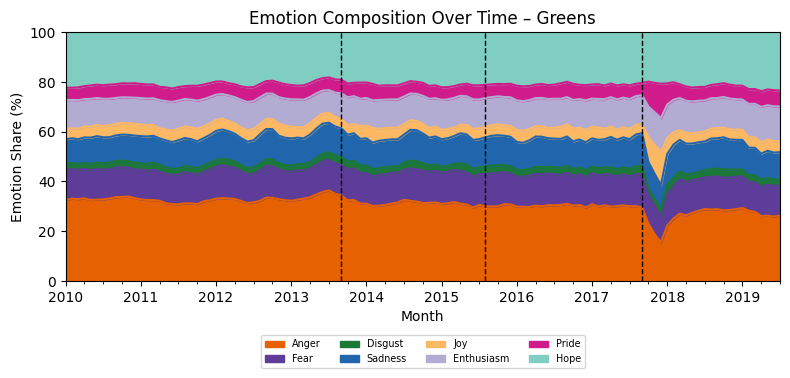

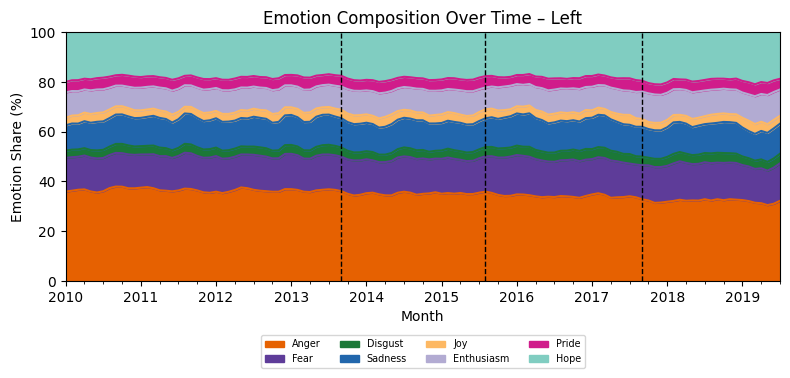

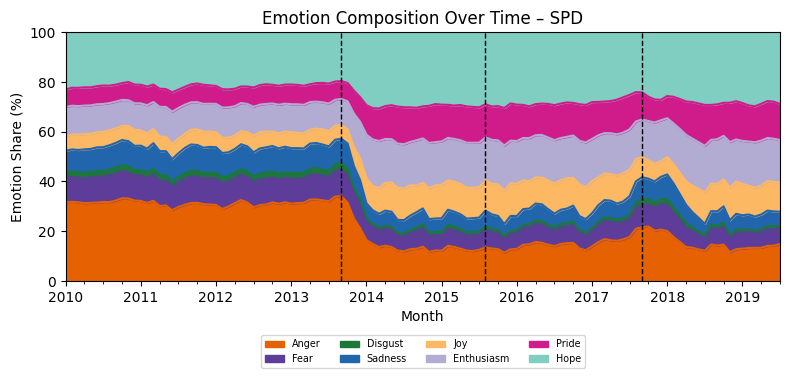

In [23]:
# reorder columns by color palette
emotion_order = list(emotion_colors.keys())
share_cols_ordered = [f"{emotion}_share" for emotion in emotion_order]

# ensure datetime format for month
df_clean['month'] = pd.to_datetime(df_clean['date']).dt.to_period('M').dt.to_timestamp()

# full timeline index
full_month_index = pd.date_range(start='2010-01-01', end=df_clean['month'].max(), freq='MS')

# important events
election_2013 = pd.to_datetime('2013-09-22')
election_2017 = pd.to_datetime('2017-09-24')
merkel_press_conf = pd.to_datetime('2015-08-31')
event_dates = [election_2013, merkel_press_conf, election_2017]
#event_labels = ["2013 Election", "Merkel: 'Wir schaffen das!'", "2017 Election"]

# plot by party
for party in df_clean['party'].unique():
    df_party = df_clean[df_clean['party'] == party]

    # group and average monthly emotion shares
    df_grouped = df_party.groupby('month')[share_cols_ordered].mean()

    # normalize to make shares sum to 100% (just emotions)
    df_grouped = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100

    # reindex to full timeline
    df_grouped = df_grouped.reindex(full_month_index)

    # fill pre-founding months (AfD before 2013) with zeros
    if party == "AfD":
        founding_date = pd.to_datetime("2013-01-01")
        df_grouped.loc[df_grouped.index < founding_date] = 0

    # interpolate and smooth
    df_grouped = df_grouped.interpolate(method='linear', limit_direction='both')
    df_grouped = df_grouped.rolling(window=3, min_periods=1).mean()

    # plot
    plt.figure(figsize=(8, 4))
    df_grouped.plot(
        kind='area',
        stacked=True,
        ax=plt.gca(),
        color=[emotion_colors[e] for e in emotion_order]
    )

    # add event markers
    #for date, label in zip(event_dates, event_labels):
    for date in event_dates:
        plt.axvline(date, color='black', linestyle='--', linewidth=1)
        #plt.text(date, 102, label, rotation=90, verticalalignment='bottom', fontsize=8)
    
    plt.title(f"Emotion Composition Over Time – {party}")
    plt.xlabel("Month")
    plt.ylabel("Emotion Share (%)")
    plt.ylim(0, 100)

    # grab handles and labels generated by matplotlib
    handles, labels = plt.gca().get_legend_handles_labels()

    # manually relabel without breaking color patch sizes
    new_labels = [label.replace('_share', '').title() for label in labels]

    # use in the legend
    plt.legend(
        handles=handles,
        labels=new_labels,
        loc='upper center',
        bbox_to_anchor=(0.5, -0.2),
        ncol=4,
        fontsize='x-small'
    )
    plt.tight_layout()
    plt.show()

-- *Stacked area plot of emotion share by party over time for each party's top issue*

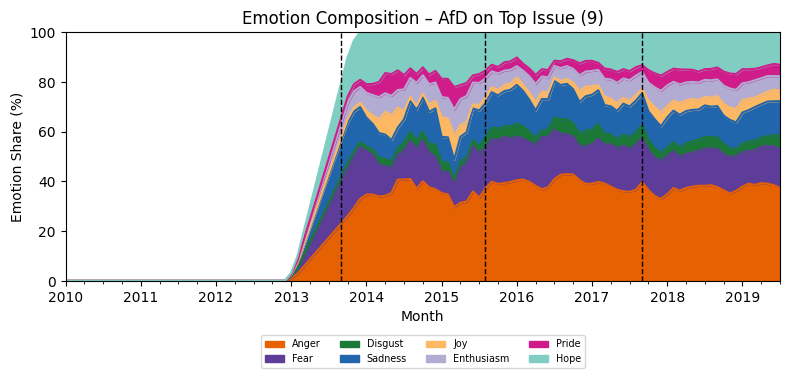

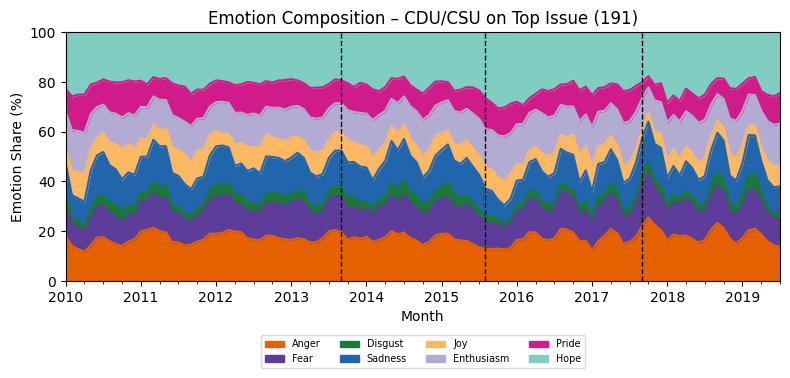

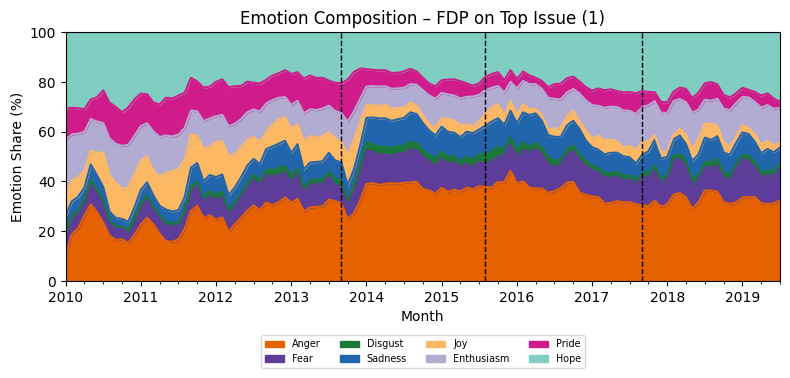

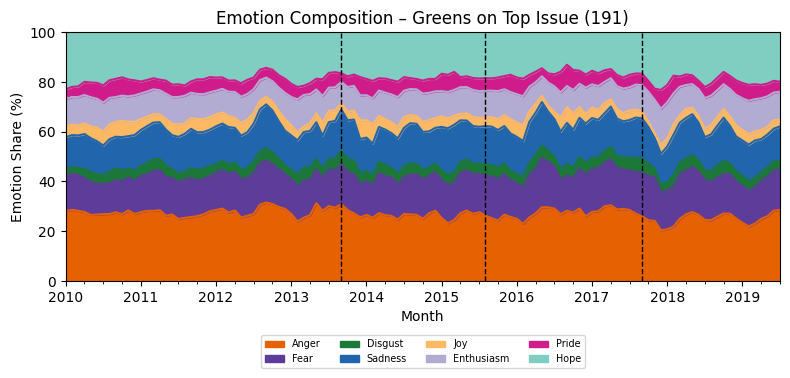

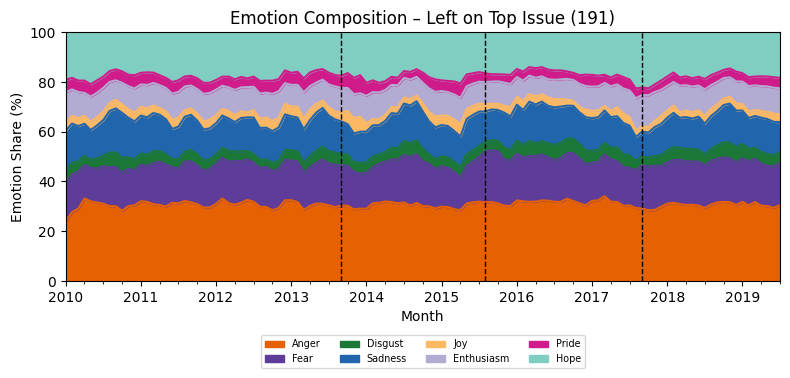

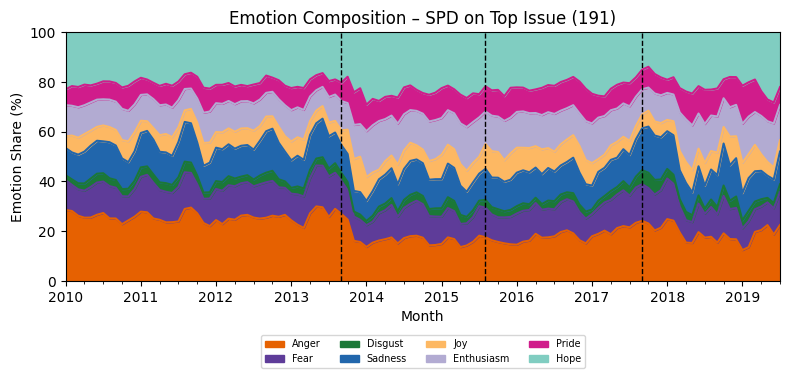

In [24]:
# identify top issue per party
top_issues_per_party = (
    df_clean.groupby(['party', 'issue_mono'])
    .size()
    .reset_index(name='n_press_releases')
    .sort_values(['party', 'n_press_releases'], ascending=[True, False])
    .groupby('party')
    .first()
    .reset_index()
)

# filter `df_clean` for only each party's top issue
df_top_issues = pd.merge(df_clean, top_issues_per_party[['party', 'issue_mono']], on=['party', 'issue_mono'])

# prepare color and column info
emotion_order = list(emotion_colors.keys())
share_cols_ordered = [f"{emotion}_share" for emotion in emotion_order]

# ensure datetime format for month
df_top_issues['month'] = pd.to_datetime(df_top_issues['date']).dt.to_period('M').dt.to_timestamp()
full_month_index = pd.date_range(start='2010-01-01', end=df_top_issues['month'].max(), freq='MS')

# event dates
election_2013 = pd.to_datetime('2013-09-22')
election_2017 = pd.to_datetime('2017-09-24')
merkel_press_conf = pd.to_datetime('2015-08-31')
event_dates = [election_2013, merkel_press_conf, election_2017]

# plot for each party
for party in df_top_issues['party'].unique():
    df_party = df_top_issues[df_top_issues['party'] == party].copy()
    issue_label = df_party['issue_mono'].iloc[0]

    df_grouped = df_party.groupby('month')[share_cols_ordered].mean()
    df_grouped = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100
    df_grouped = df_grouped.reindex(full_month_index)

    if party == "AfD":
        founding_date = pd.to_datetime("2013-01-01")
        df_grouped.loc[df_grouped.index < founding_date] = 0

    df_grouped = df_grouped.interpolate(method='linear', limit_direction='both')
    df_grouped = df_grouped.rolling(window=3, min_periods=1).mean()

    # plot
    plt.figure(figsize=(8, 4))
    df_grouped.plot(
        kind='area',
        stacked=True,
        ax=plt.gca(),
        color=[emotion_colors[e] for e in emotion_order]
    )

    for date in event_dates:
        plt.axvline(date, color='black', linestyle='--', linewidth=1)

    plt.title(f"Emotion Composition – {party} on Top Issue ({int(issue_label)})")
    plt.xlabel("Month")
    plt.ylabel("Emotion Share (%)")
    plt.ylim(0, 100)

    handles, labels = plt.gca().get_legend_handles_labels()
    new_labels = [label.replace('_share', '').title() for label in labels]
    plt.legend(
        handles=handles,
        labels=new_labels,
        loc='upper center',
        bbox_to_anchor=(0.5, -0.2),
        ncol=4,
        fontsize='x-small'
    )

    plt.tight_layout()
    plt.show()

-- *Stacked area plot of emotion share by party over time for each party's top 3 issues*

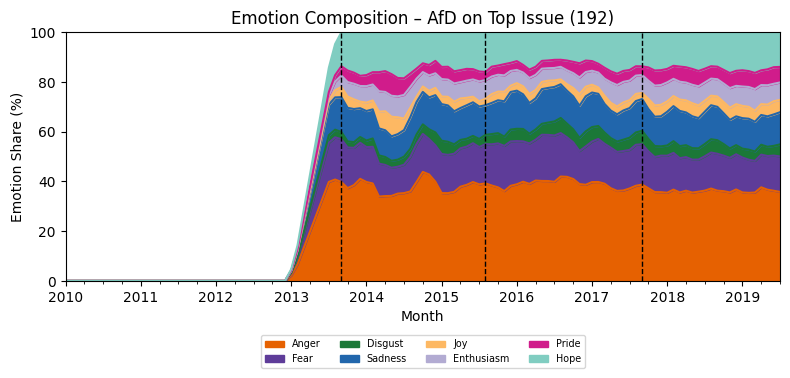

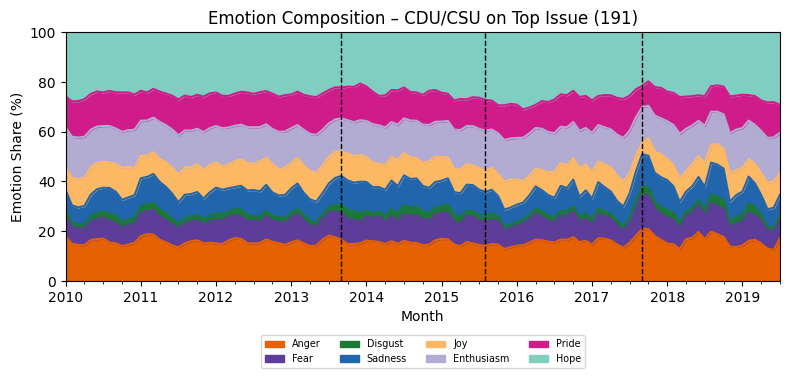

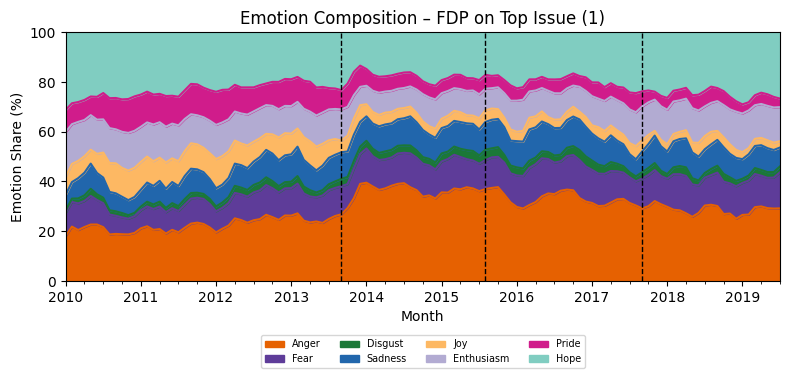

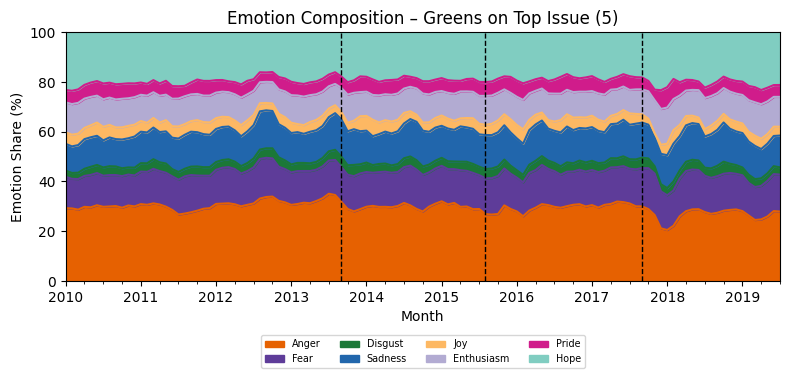

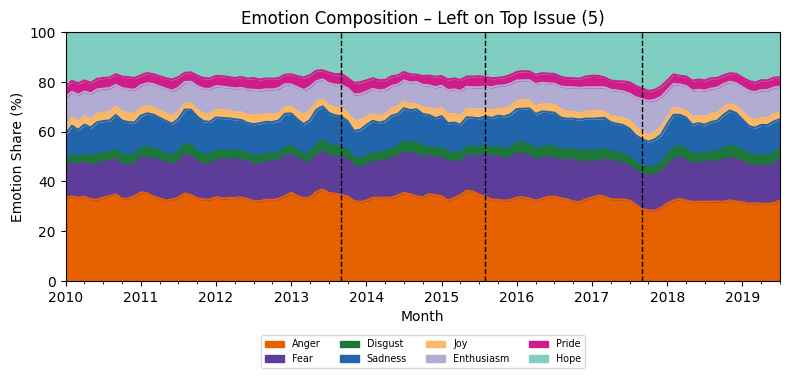

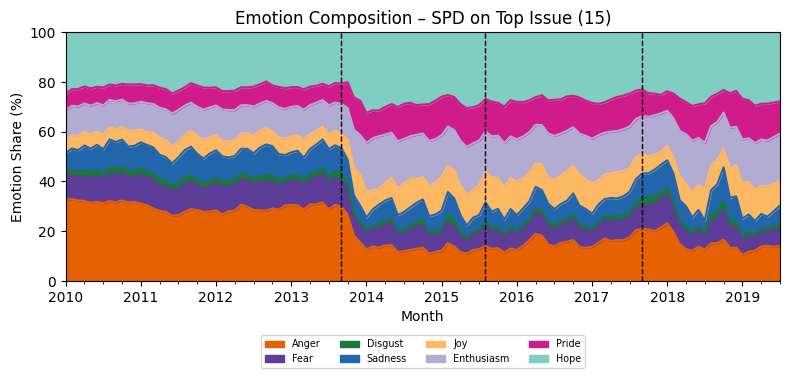

In [25]:
# get top 3 issues per party
top_issues_per_party = (
    df_clean.groupby(['party', 'issue_mono'])
    .size()
    .reset_index(name='n_press_releases')
    .sort_values(['party', 'n_press_releases'], ascending=[True, False])
    .groupby('party')
    .head(3)
)

# filter `df_clean` to only these rows
df_top_issues = df_clean.merge(top_issues_per_party[['party', 'issue_mono']], on=['party', 'issue_mono'])

# prepare color and column info
emotion_order = list(emotion_colors.keys())
share_cols_ordered = [f"{emotion}_share" for emotion in emotion_order]

# ensure datetime format for month
df_top_issues['month'] = pd.to_datetime(df_top_issues['date']).dt.to_period('M').dt.to_timestamp()
full_month_index = pd.date_range(start='2010-01-01', end=df_top_issues['month'].max(), freq='MS')

# event dates
election_2013 = pd.to_datetime('2013-09-22')
election_2017 = pd.to_datetime('2017-09-24')
merkel_press_conf = pd.to_datetime('2015-08-31')
event_dates = [election_2013, merkel_press_conf, election_2017]

# plot for each party
for party in df_top_issues['party'].unique():
    df_party = df_top_issues[df_top_issues['party'] == party].copy()
    issue_label = df_party['issue_mono'].iloc[0]

    df_grouped = df_party.groupby('month')[share_cols_ordered].mean()
    df_grouped = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100
    df_grouped = df_grouped.reindex(full_month_index)

    if party == "AfD":
        founding_date = pd.to_datetime("2013-01-01")
        df_grouped.loc[df_grouped.index < founding_date] = 0

    df_grouped = df_grouped.interpolate(method='linear', limit_direction='both')
    df_grouped = df_grouped.rolling(window=3, min_periods=1).mean()

    # plot
    plt.figure(figsize=(8, 4))
    df_grouped.plot(
        kind='area',
        stacked=True,
        ax=plt.gca(),
        color=[emotion_colors[e] for e in emotion_order]
    )

    for date in event_dates:
        plt.axvline(date, color='black', linestyle='--', linewidth=1)

    plt.title(f"Emotion Composition – {party} on Top Issue ({int(issue_label)})")
    plt.xlabel("Month")
    plt.ylabel("Emotion Share (%)")
    plt.ylim(0, 100)

    handles, labels = plt.gca().get_legend_handles_labels()
    new_labels = [label.replace('_share', '').title() for label in labels]
    plt.legend(
        handles=handles,
        labels=new_labels,
        loc='upper center',
        bbox_to_anchor=(0.5, -0.2),
        ncol=4,
        fontsize='x-small'
    )

    plt.tight_layout()
    plt.show()

<hr style="opacity: 0.25">

### Visualize results (normalized emotions)

-- *Distribution of each (normalized) emotion over time*

In [26]:
# melt normalized emotion columns
emotion_cols_norm = [col + '_norm' for col in emotion_cols]

df_melted = df_clean.melt(
    id_vars=['month'],
    value_vars=emotion_cols_norm,
    var_name='emotion',
    value_name='value'
)
df_melted['emotion'] = df_melted['emotion'].str.replace('_norm', '')

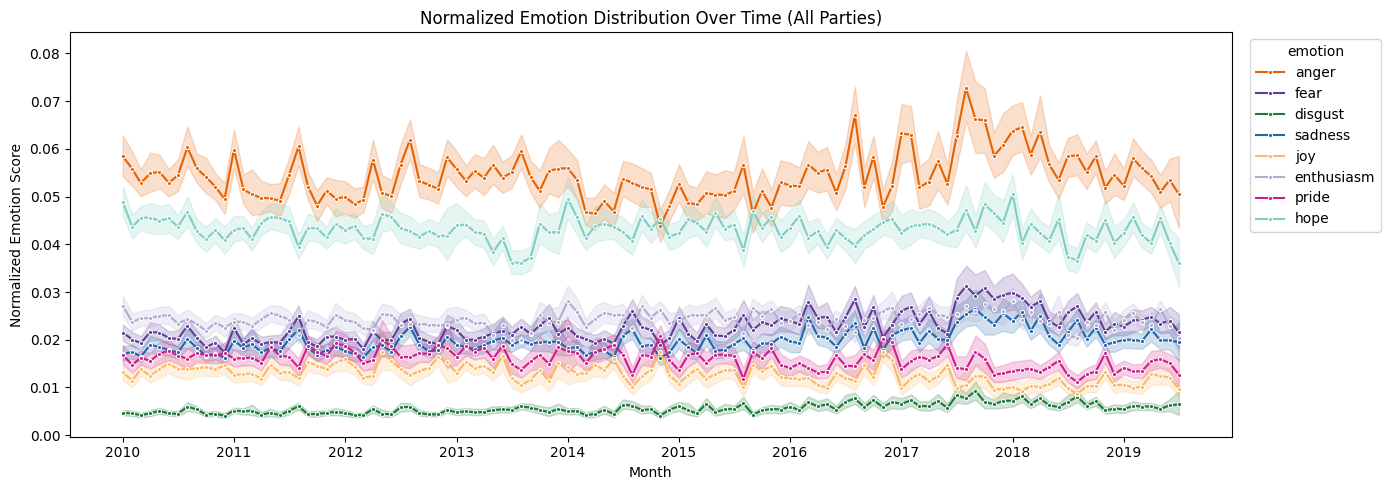

In [27]:
# plot
plt.figure(figsize=(14, 5))

sns.lineplot(
    data=df_melted,
    x='month',
    y='value',
    hue='emotion',
    palette=emotion_colors,
    linewidth=1.5,
    marker='o',
    markersize=3
)

plt.title("Normalized Emotion Distribution Over Time (All Parties)")
plt.xlabel("Month")
plt.ylabel("Normalized Emotion Score")
plt.legend(title='emotion', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

-- *Line plot of each emotion by party over time (monthly)*

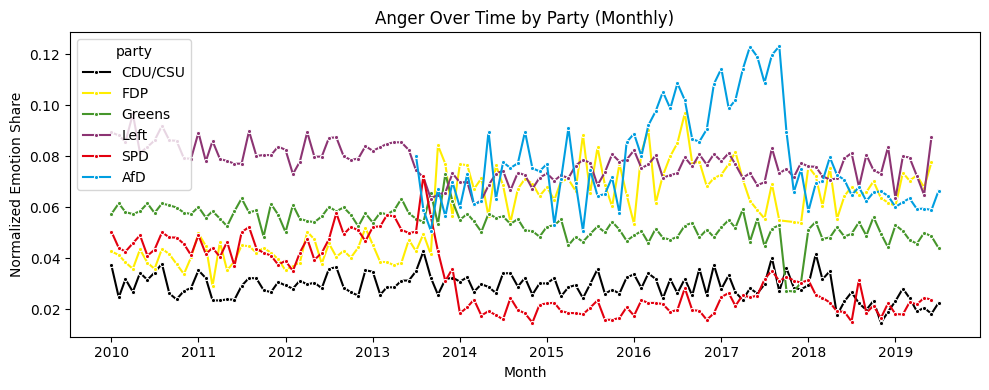

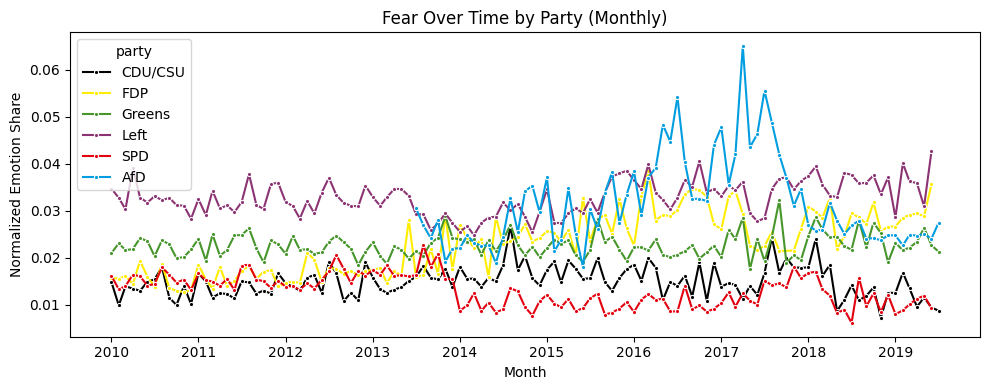

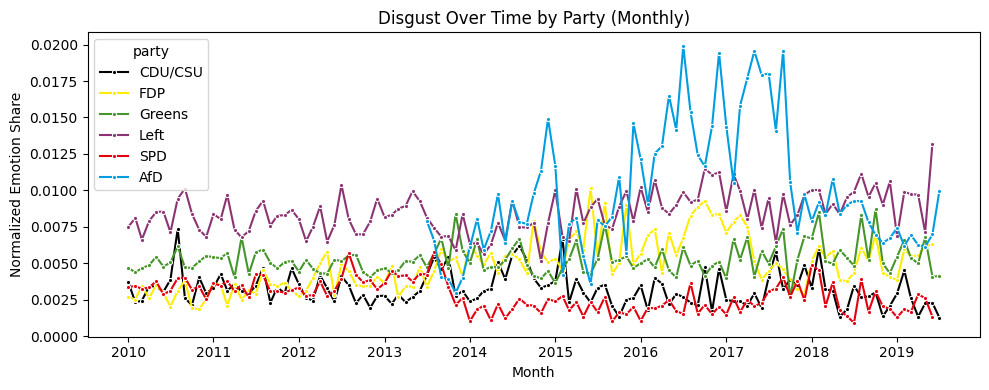

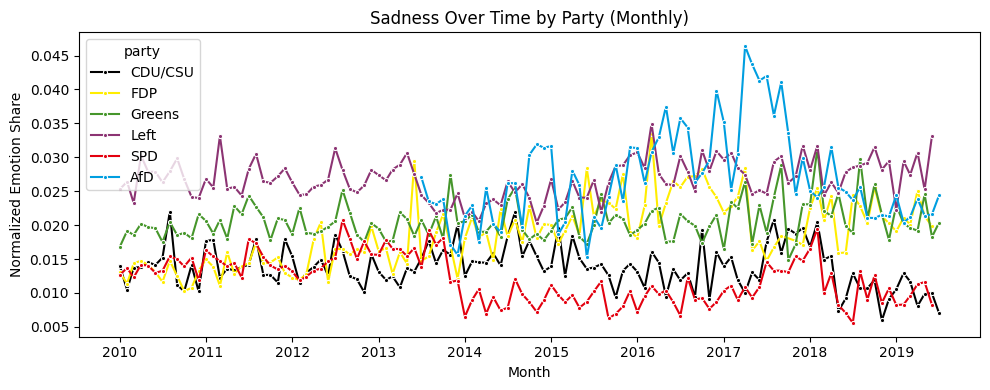

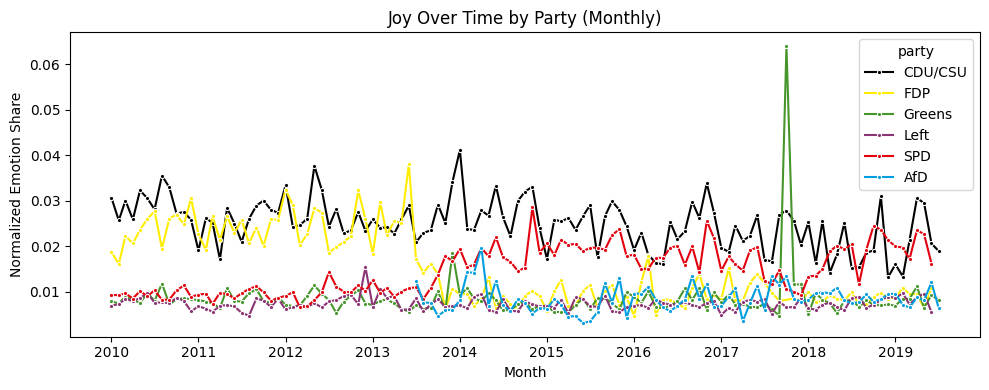

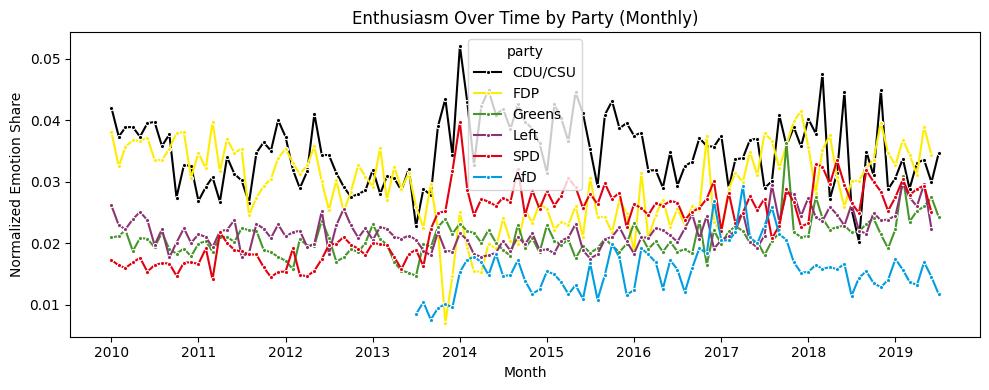

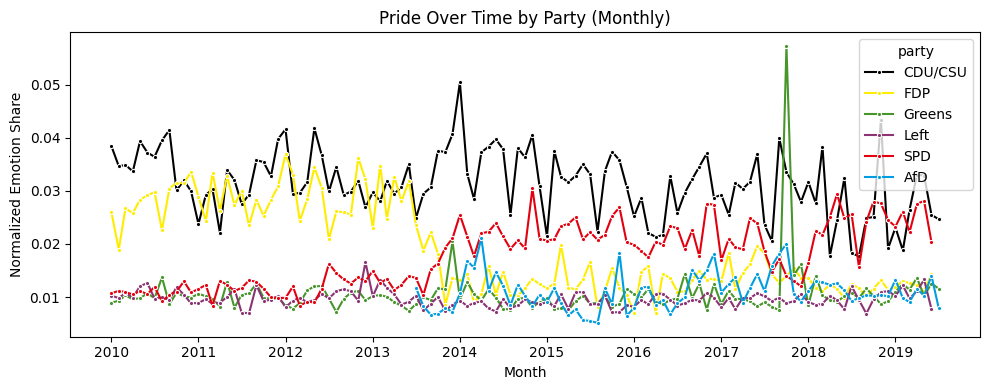

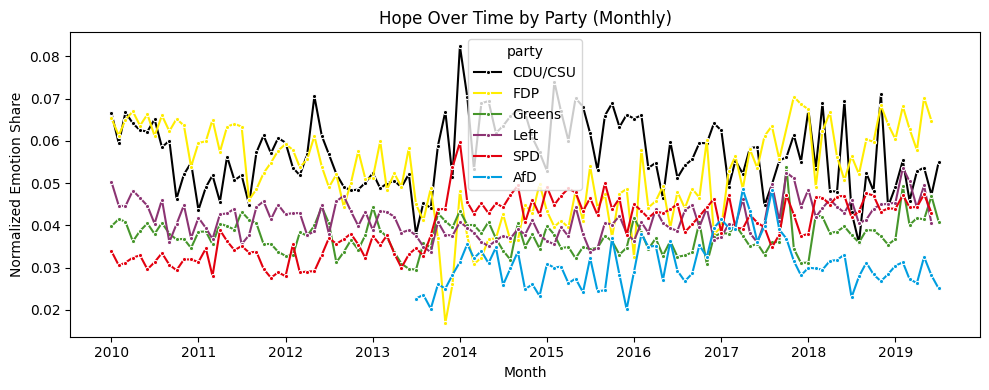

In [28]:
# Convert date and create month column
df_clean['month'] = pd.to_datetime(df_clean['date']).dt.to_period('M').dt.to_timestamp()

# Melt emotion columns
df_melted_month = df_clean.melt(
    id_vars=['month', 'party'],
    value_vars=emotion_cols_norm,
    var_name='emotion',
    value_name='value'
)
df_melted_month['emotion'] = df_melted_month['emotion'].str.replace('_norm', '')

# Group by month, party, emotion
df_monthly = df_melted_month.groupby(['month', 'party', 'emotion'])['value'].mean().reset_index()

# Plot each emotion over time by party
for emotion in emotion_cols:
    plt.figure(figsize=(10, 4))
    sns.lineplot(
        data=df_monthly[df_monthly['emotion'] == emotion],
        x='month',
        y='value',
        hue='party',
        palette=party_colors,
        marker='o',
        markersize=3,
        linewidth=1.5
    )
    plt.title(f'{emotion.title()} Over Time by Party (Monthly)')
    plt.xlabel('Month')
    plt.ylabel('Normalized Emotion Share')
    plt.tight_layout()
    plt.show()

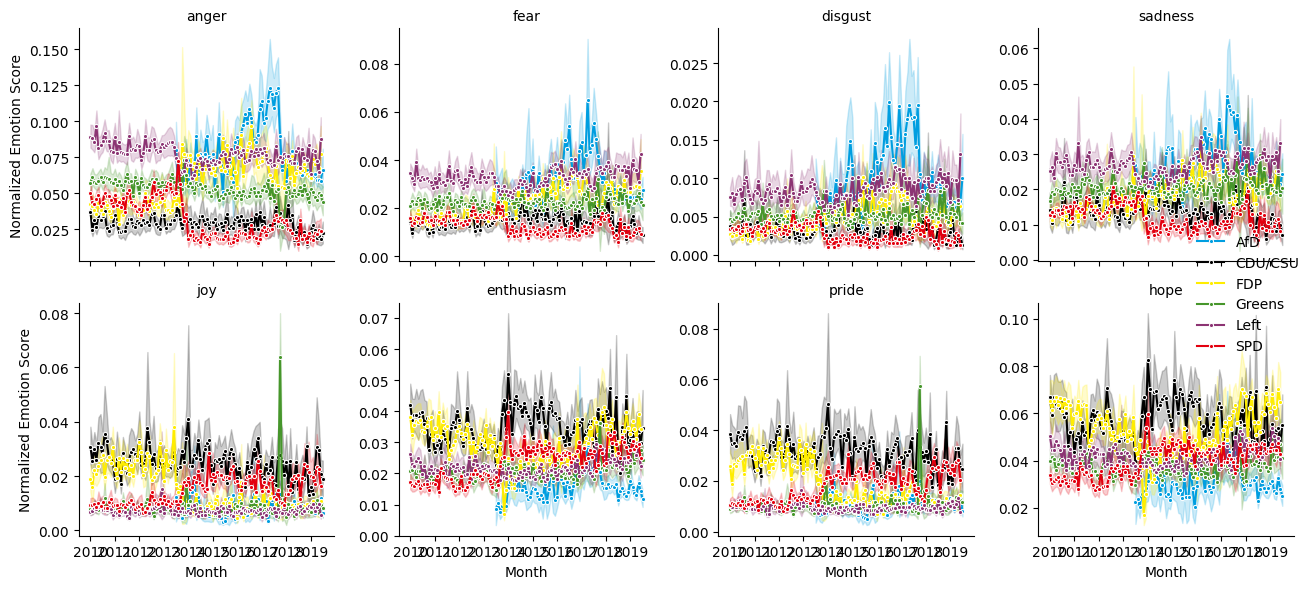

In [29]:
## arrange plots

# make sure month column is datetime
df_clean['month'] = pd.to_datetime(df_clean['date']).dt.to_period('M').dt.to_timestamp()

# melt normalized emotion columns
df_melted_month = df_clean.melt(
    id_vars=['month', 'party'],
    value_vars=emotion_cols_norm,
    var_name='emotion',
    value_name='value'
)
df_melted_month['emotion'] = df_melted_month['emotion'].str.replace('_norm', '')

# plot with FacetGrid
g = sns.FacetGrid(
    df_melted_month,
    col="emotion",
    col_wrap=4,
    height=3,
    sharey=False
)
g.map_dataframe(
    sns.lineplot,
    x="month",
    y="value",
    hue="party",
    marker="o",
    linewidth=1.5,
    markersize=3,
    palette=party_colors
)
g.add_legend()
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Month", "Normalized Emotion Score")
plt.tight_layout()
plt.show()

-- *Line plot of each emotion by party over time (quarterly)*

In [30]:
# create quarterly period
df_clean['quarter'] = pd.to_datetime(df_clean['date']).dt.to_period('Q').dt.start_time

# melt emotion columns
df_melted_quarter = df_clean.melt(
    id_vars=['quarter', 'party'],
    value_vars=emotion_cols_norm,
    var_name='emotion',
    value_name='value'
)
df_melted_quarter['emotion'] = df_melted_quarter['emotion'].str.replace('_norm', '')

# group by quarter, party, emotion
df_quarterly = df_melted_quarter.groupby(['quarter', 'party', 'emotion'])['value'].mean().reset_index()

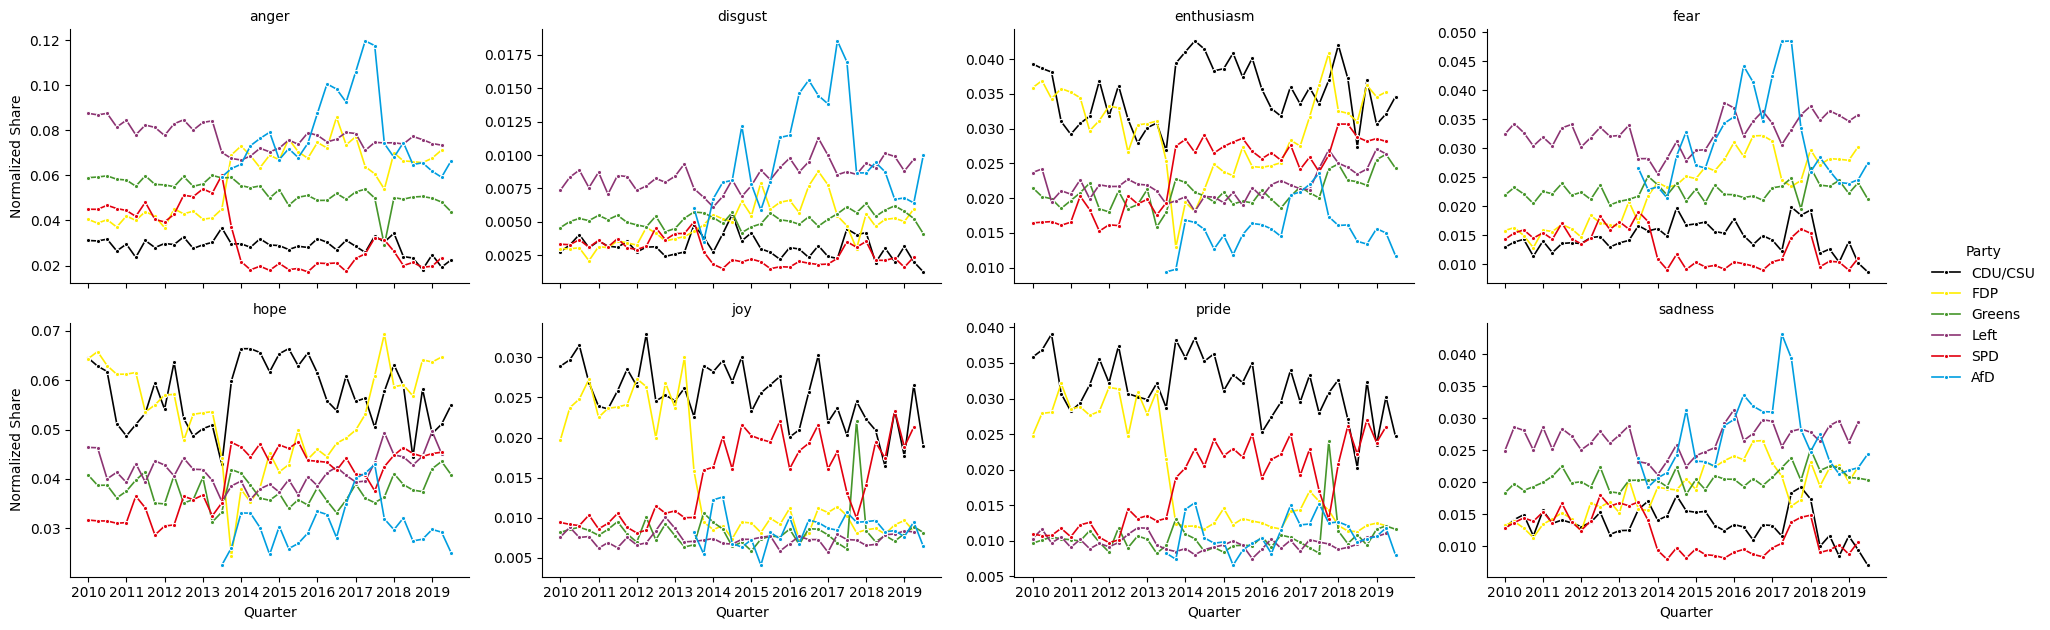

In [31]:
# plot
g = sns.FacetGrid(
    df_quarterly,
    col="emotion",
    col_wrap=4,
    height=3.2,
    sharey=False,
    aspect=1.4
)
g.map_dataframe(
    sns.lineplot,
    x="quarter",
    y="value",
    hue="party",
    marker="o",
    linewidth=1.2,
    markersize=3,
    palette=party_colors
)
g.set_titles("{col_name}")
g.set_axis_labels("Quarter", "Normalized Share")
g.add_legend(title="Party", bbox_to_anchor=(1.01, 0.5), loc="center left")
plt.tight_layout()
plt.show()

<hr style="opacity: 0.25">

### Run regressions

In [ ]:
# prepare df for regressions
df_reg = df_quarterly.pivot_table(index=['quarter', 'party'], columns='emotion', values='value').reset_index()

In [ ]:
# decide on dependent variables and add independent variables



In [ ]:
# run regression

# example: poll data or issue_mono as DV, emotions as IVs
model = smf.ols('XXXX ~ anger + joy + fear + disgust + sadness + enthusiasm + pride + hope', data=df_reg).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  anger   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     42.81
Date:                Sun, 13 Apr 2025   Prob (F-statistic):           4.05e-37
Time:                        15:21:06   Log-Likelihood:                 406.34
No. Observations:                 217   AIC:                            -796.7
Df Residuals:                     209   BIC:                            -769.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0496      0.009      5.437      0.0

<hr style="opacity: 0.25">

### Most discussed issues

-- *Look at most frequently discussed issues*

In [32]:
# count how many press releases cover each issue
issue_counts = df_clean['issue_mono'].value_counts().reset_index()
issue_counts.columns = ['issue_mono', 'n_press_releases']

# preview the top issues
print(issue_counts.head(10))

   issue_mono  n_press_releases
0         191              5658
1           2              3191
2          12              2815
3           5              2800
4          15              2669
5         192              2452
6           6              2303
7           1              2284
8           9              2225
9           8              2083


In [33]:
# count number of press releases per party per issue
issue_party_counts = df_clean.groupby(['party', 'issue_mono']).size().reset_index(name='n_press_releases')

# get top N
top_issues_per_party = (
    issue_party_counts
    .sort_values(['party', 'n_press_releases'], ascending=[True, False])
    .groupby('party')
    .head(3)
    .reset_index(drop=True)
)

# show top issues by party
print(top_issues_per_party)

      party  issue_mono  n_press_releases
0       AfD           9               561
1       AfD         192               420
2       AfD           2               367
3   CDU/CSU         191               999
4   CDU/CSU           2               604
5   CDU/CSU          15               579
6       FDP           1               713
7       FDP         191               663
8       FDP          12               446
9    Greens         191              1253
10   Greens           4               620
11   Greens           5               546
12     Left         191              1480
13     Left           5              1119
14     Left          16               857
15      SPD         191               983
16      SPD           6               869
17      SPD          15               818


In [34]:
# filter to top N issues
top_issues = issue_counts['issue_mono'].head(7).tolist()

# filter the dataset
df_top_issues = df_clean[df_clean['issue_mono'].isin(top_issues)].copy()

In [35]:
# melt and prepare data for plotting

# melt emotion columns
df_melted_issues = df_top_issues.melt(
    id_vars=['month', 'party', 'issue_mono'],
    value_vars=emotion_cols_norm,
    var_name='emotion',
    value_name='value'
)
df_melted_issues['emotion'] = df_melted_issues['emotion'].str.replace('_norm', '')
df_melted_issues['emotion'] = df_melted_issues['emotion'].str.title()

-- *Immigration issue*

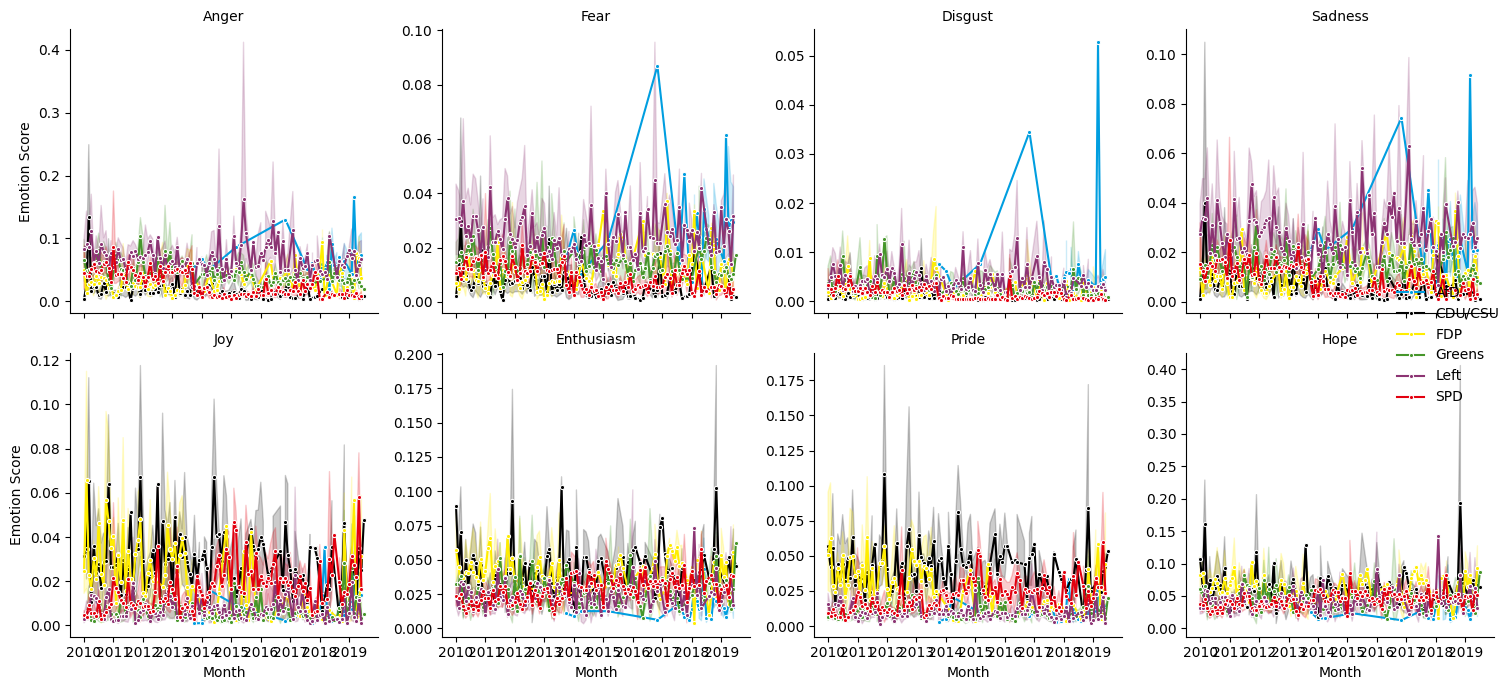

In [36]:
# facet by emotion, color by party, top issue

issue_focus = top_issues[6]
df_focus = df_melted_issues[df_melted_issues['issue_mono'] == issue_focus]

g = sns.FacetGrid(df_focus, col="emotion", col_wrap=4, height=3.5, sharey=False)
g.map_dataframe(
    sns.lineplot,
    x="month",
    y="value",
    hue="party",
    marker="o",
    markersize=3,
    linewidth=1.5,
    palette=party_colors
)
g.set_titles(col_template="{col_name}")
g.add_legend()
g.set_axis_labels("Month", "Emotion Score")
plt.tight_layout()
plt.show()

-- *Group-level emotion distributions by issue*

In [40]:
# table average emotion share per issue
df_emotion_share = df_clean.melt(
    id_vars=['issue_label'],
    value_vars=[f"{e}_share" for e in emotion_colors.keys()],
    var_name='emotion',
    value_name='share'
)

df_emotion_share['emotion'] = df_emotion_share['emotion'].str.replace('_share', '').str.title()

avg_share_by_issue = (
    df_emotion_share
    .groupby(['issue_label', 'emotion'])['share']
    .mean()
    .reset_index()
)

In [41]:
# ensure lowercase emotion labels to match emotion_colors
avg_share_by_issue['emotion'] = avg_share_by_issue['emotion'].str.lower()

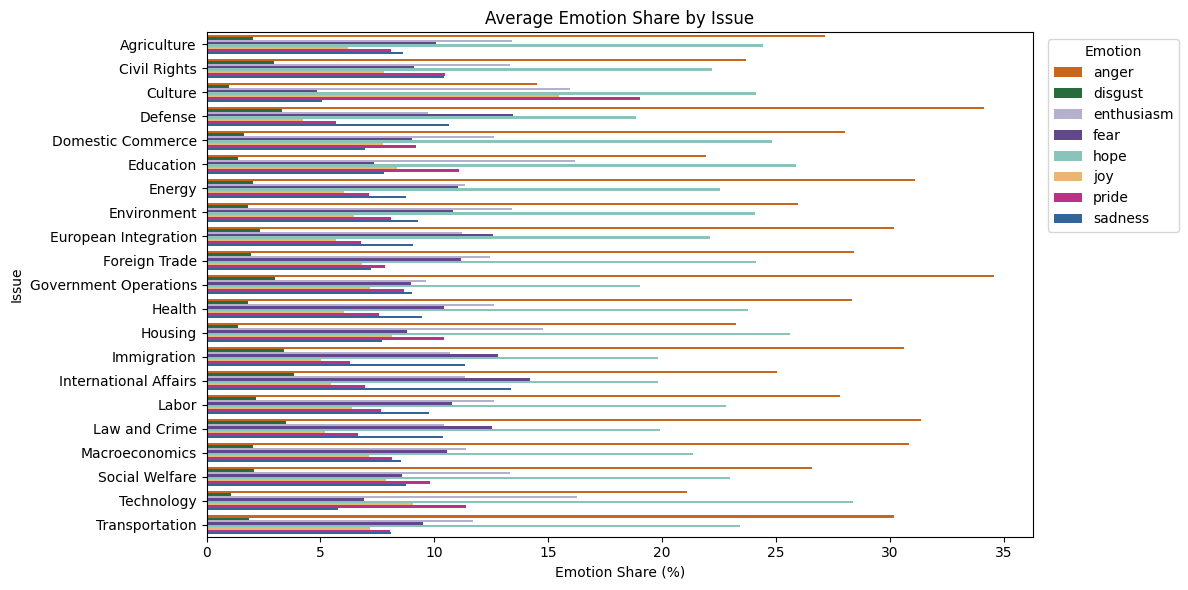

In [42]:
# plot emotion share by issue (grouped bar chart)
plt.figure(figsize=(12, 6))
sns.barplot(
    data=avg_share_by_issue,
    x='share',
    y='issue_label',
    hue='emotion',
    palette=emotion_colors
)
plt.title("Average Emotion Share by Issue")
plt.xlabel("Emotion Share (%)")
plt.ylabel("Issue")
plt.legend(title='Emotion', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

-- *Plot top 7 most discussed issues*

In [45]:
# get top 7 most discussed issues
top_issues = (
    df_clean['issue_mono'].value_counts()
    .head(7)
    .index.tolist()
)

# filter data to only those issues
df_top_issues = df_clean[df_clean['issue_mono'].isin(top_issues)].copy()

In [46]:
# list of normalized and share columns
emotion_cols_norm = [col for col in df_clean.columns if col.endswith('_norm')]
emotion_share_cols = [col for col in df_clean.columns if col.endswith('_share')]

# melt normalized columns
df_melted_intensity = df_top_issues.melt(
    id_vars=['issue_label'],
    value_vars=emotion_cols_norm,
    var_name='emotion',
    value_name='intensity'
)
df_melted_intensity['emotion'] = df_melted_intensity['emotion'].str.replace('_norm', '').str.lower()

# melt share columns
df_melted_share = df_top_issues.melt(
    id_vars=['issue_label'],
    value_vars=emotion_share_cols,
    var_name='emotion',
    value_name='share'
)
df_melted_share['emotion'] = df_melted_share['emotion'].str.replace('_share', '').str.lower()

# group by issue and emotion
avg_intensity_by_issue = df_melted_intensity.groupby(['issue_label', 'emotion'])['intensity'].mean().reset_index()
avg_share_by_issue = df_melted_share.groupby(['issue_label', 'emotion'])['share'].mean().reset_index()

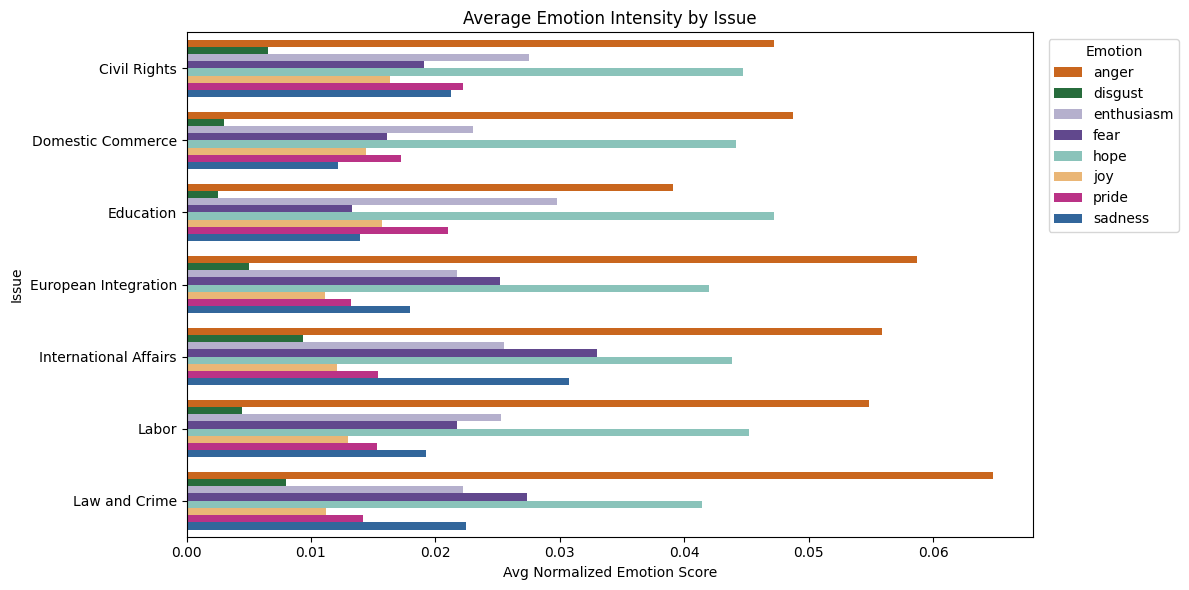

In [47]:
# plot average emotion intensity by issue
plt.figure(figsize=(12, 6))
sns.barplot(
    data=avg_intensity_by_issue,
    x='intensity',
    y='issue_label',
    hue='emotion',
    palette=emotion_colors
)
plt.title("Average Emotion Intensity by Issue")
plt.xlabel("Avg Normalized Emotion Score")
plt.ylabel("Issue")
plt.legend(title='Emotion', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

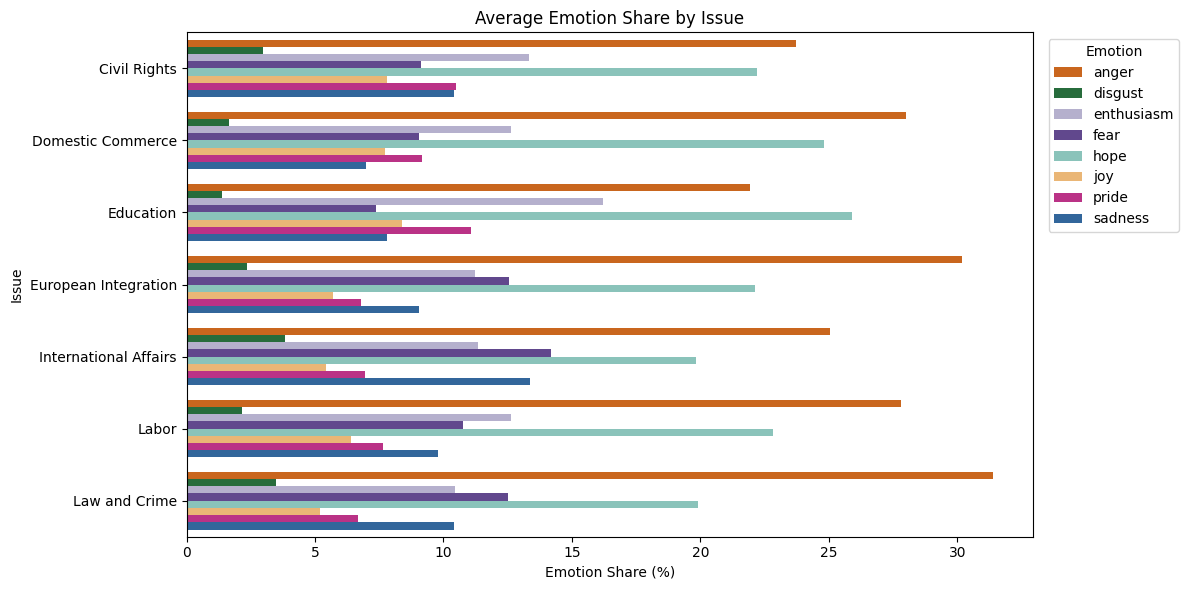

In [48]:
# plot average emotion share by issue
plt.figure(figsize=(12, 6))
sns.barplot(
    data=avg_share_by_issue,
    x='share',
    y='issue_label',
    hue='emotion',
    palette=emotion_colors
)
plt.title("Average Emotion Share by Issue")
plt.xlabel("Emotion Share (%)")
plt.ylabel("Issue")
plt.legend(title='Emotion', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

-- *Most relevant issue for each emotion*

In [ ]:
# which issue is the most relevant for each emotion? find the most press releases by issue for each emotion